In [1]:
import pandas as pd
import numpy as np

# Read in the data
JJ = pd.read_csv("merged_df.csv", index_col=0)
Shuja = pd.read_csv("tmdb_raw_data.csv", index_col=0)
Jackson = pd.read_csv("mar_22_imdb_genre_sep.csv", index_col=0)

In [2]:
JJ

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
140,The Departure (2017 film),0.05,100,100+ Ratings,2017,RT,Documentary,['Lana Wilson'],87
112,The Woman Who Loves Giraffes (page does not ex...,0.04,100,Fewer than 50 Verified Ratings,2018,RT,Documentary,['Alison Reid'],83
20,Brother's Keeper (2022 film) (page does not ex...,133.90,100,Fewer than 50 Ratings,2021,RT,Drama,['Ferit Karahan'],85
76,Diana Kennedy: Nothing Fancy (page does not ex...,0.01,100,Fewer than 50 Ratings,2019,RT,Documentary,['Elizabeth Carroll'],73
146,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2.70,100,Fewer than 50 Ratings,2017,RT,Documentary,['Samuel D. Pollard'],100
...,...,...,...,...,...,...,...,...,...
341,King Creole,5.21,82,"5,000+ Ratings",1958,RT,Musical,['Michael Curtiz'],116
281,Law of Desire,NaN,82,"5,000+ Ratings",1987,RT,Comedy,['Pedro Almodóvar'],100
134,Keep the Change (2018 film) (page does not exist),0.64,82,100+ Ratings,2017,RT,Romance,['Rachel Israel'],94
191,Kajaki (film),9.90,82,"2,500+ Ratings",2014,RT,War,['Paul Katis'],108


In [3]:
Shuja

,title,director,genre,rating,revenue,length,source,votes,year
0,The Godfather,Francis Ford Coppola,"['Drama', 'Crime']",87,245.07,175,TMDB,10000+ Ratings,1972
1,The Shawshank Redemption,Frank Darabont,"['Drama', 'Crime']",87,28.34,142,TMDB,10000+ Ratings,1994
2,Cuando Sea Joven,Raúl Martínez,"['Comedy', 'Fantasy']",87,2.03,115,TMDB,100+ Ratings,2022
3,The Godfather Part II,Francis Ford Coppola,"['Drama', 'Crime']",86,102.60,202,TMDB,10000+ Ratings,1974
4,Schindler's List,Steven Spielberg,"['Drama', 'History', 'War']",86,321.37,195,TMDB,10000+ Ratings,1993
...,...,...,...,...,...,...,...,...,...
245,Rocco and His Brothers,Luchino Visconti,"['Crime', 'Drama']",81,0.01,178,TMDB,250+ Ratings,1960
246,Jojo Rabbit,Taika Waititi,"['Comedy', 'War', 'Drama']",81,82.47,108,TMDB,5000+ Ratings,2019
247,"Love, Simon",Greg Berlanti,"['Comedy', 'Drama', 'Romance']",81,66.32,110,TMDB,5000+ Ratings,2018
248,Hidden Figures,Theodore Melfi,"['Drama', 'History']",81,235.96,127,TMDB,5000+ Ratings,2016


In [4]:
Shuja.rename(columns={"rating": "user_rating",  "length": "runtime_in_minutes"}, inplace=True)
Shuja

,title,director,genre,user_rating,revenue,runtime_in_minutes,source,votes,year
0,The Godfather,Francis Ford Coppola,"['Drama', 'Crime']",87,245.07,175,TMDB,10000+ Ratings,1972
1,The Shawshank Redemption,Frank Darabont,"['Drama', 'Crime']",87,28.34,142,TMDB,10000+ Ratings,1994
2,Cuando Sea Joven,Raúl Martínez,"['Comedy', 'Fantasy']",87,2.03,115,TMDB,100+ Ratings,2022
3,The Godfather Part II,Francis Ford Coppola,"['Drama', 'Crime']",86,102.60,202,TMDB,10000+ Ratings,1974
4,Schindler's List,Steven Spielberg,"['Drama', 'History', 'War']",86,321.37,195,TMDB,10000+ Ratings,1993
...,...,...,...,...,...,...,...,...,...
245,Rocco and His Brothers,Luchino Visconti,"['Crime', 'Drama']",81,0.01,178,TMDB,250+ Ratings,1960
246,Jojo Rabbit,Taika Waititi,"['Comedy', 'War', 'Drama']",81,82.47,108,TMDB,5000+ Ratings,2019
247,"Love, Simon",Greg Berlanti,"['Comedy', 'Drama', 'Romance']",81,66.32,110,TMDB,5000+ Ratings,2018
248,Hidden Figures,Theodore Melfi,"['Drama', 'History']",81,235.96,127,TMDB,5000+ Ratings,2016


In [5]:
# reorder the columns

Shuja = Shuja.reindex(columns=['title','revenue', 'user_rating', 'votes', 'year', 'source','genre', 'director', 'runtime_in_minutes'])
Shuja

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
0,The Godfather,245.07,87,10000+ Ratings,1972,TMDB,"['Drama', 'Crime']",Francis Ford Coppola,175
1,The Shawshank Redemption,28.34,87,10000+ Ratings,1994,TMDB,"['Drama', 'Crime']",Frank Darabont,142
2,Cuando Sea Joven,2.03,87,100+ Ratings,2022,TMDB,"['Comedy', 'Fantasy']",Raúl Martínez,115
3,The Godfather Part II,102.60,86,10000+ Ratings,1974,TMDB,"['Drama', 'Crime']",Francis Ford Coppola,202
4,Schindler's List,321.37,86,10000+ Ratings,1993,TMDB,"['Drama', 'History', 'War']",Steven Spielberg,195
...,...,...,...,...,...,...,...,...,...
245,Rocco and His Brothers,0.01,81,250+ Ratings,1960,TMDB,"['Crime', 'Drama']",Luchino Visconti,178
246,Jojo Rabbit,82.47,81,5000+ Ratings,2019,TMDB,"['Comedy', 'War', 'Drama']",Taika Waititi,108
247,"Love, Simon",66.32,81,5000+ Ratings,2018,TMDB,"['Comedy', 'Drama', 'Romance']",Greg Berlanti,110
248,Hidden Figures,235.96,81,5000+ Ratings,2016,TMDB,"['Drama', 'History']",Theodore Melfi,127


In [6]:
Jackson.rename(columns={"Title":"title", "Director":"director", "Year":"year","Genre":"genre","Revenue":"revenue","User_Rating":"user_rating","Length":"runtime_in_minutes","Source":"source","Votes":"votes" }, inplace=True)

In [7]:
Jackson.reindex(columns=['title','revenue', 'user_rating', 'votes', 'year', 'source','genre', 'director', 'runtime_in_minutes'])

,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
0,The Shawshank Redemption,28.34,93,"250,000 votes and above",1994,IMDb,['Drama '],Frank Darabont,142
1,The Godfather,134.97,92,"250,000 votes and above",1972,IMDb,"['Crime', ' Drama ']",Francis Ford Coppola,175
2,The Dark Knight,534.86,90,"250,000 votes and above",2008,IMDb,"['Action', ' Crime', ' Drama ']",Christopher Nolan,152
3,The Lord of the Rings: The Return of the King,377.85,90,"250,000 votes and above",2003,IMDb,"['Action', ' Adventure', ' Drama ']",Peter Jackson,201
4,Schindler's List,96.90,90,"250,000 votes and above",1993,IMDb,"['Biography', ' Drama', ' History ']",Steven Spielberg,195
...,...,...,...,...,...,...,...,...,...
245,Memories of Murder,0.01,81,"50,000 to 100,000 votes",2003,IMDb,"['Crime', ' Drama', ' Mystery ']",Bong Joon Ho,131
246,Million Dollar Baby,100.49,81,"50,000 to 100,000 votes",2004,IMDb,"['Drama', ' Sport ']",Clint Eastwood,132
247,Before Sunrise,5.54,81,"50,000 to 100,000 votes",1995,IMDb,"['Drama', ' Romance ']",Richard Linklater,101
248,How to Train Your Dragon,217.58,81,"50,000 to 100,000 votes",2010,IMDb,"['Animation', ' Action', ' Adventure ...",Dean DeBlois,98


# Merge the data

In [8]:
import pandas as pd

In [9]:
# merge the dataframes

merged_df = pd.concat([JJ, Shuja, Jackson], ignore_index=True)
    

merged_df['genre'] = merged_df['genre'].apply(lambda x: [g.strip() for g in x.split(',')])
before_explode_mergered_df = merged_df
merged_df = merged_df.explode('genre')



for index, row in merged_df.iterrows():
    genres = row['genre']
    genres = str(genres).replace('[', '').replace(']', '')
    merged_df.at[index, 'genre'] = genres


merged_df


,title,revenue,user_rating,votes,year,source,genre,director,runtime_in_minutes
0,The Departure (2017 film),0.05,100,100+ Ratings,2017,RT,Documentary,['Lana Wilson'],87
1,The Woman Who Loves Giraffes (page does not ex...,0.04,100,Fewer than 50 Verified Ratings,2018,RT,Documentary,['Alison Reid'],83
2,Brother's Keeper (2022 film) (page does not ex...,133.90,100,Fewer than 50 Ratings,2021,RT,Drama,['Ferit Karahan'],85
3,Diana Kennedy: Nothing Fancy (page does not ex...,0.01,100,Fewer than 50 Ratings,2019,RT,Documentary,['Elizabeth Carroll'],73
4,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2.70,100,Fewer than 50 Ratings,2017,RT,Documentary,['Samuel D. Pollard'],100
...,...,...,...,...,...,...,...,...,...
749,How to Train Your Dragon,217.58,81,"50,000 to 100,000 votes",2010,IMDb,' Adventure ',Dean DeBlois,98
749,How to Train Your Dragon,217.58,81,"50,000 to 100,000 votes",2010,IMDb,' Adventure ',Dean DeBlois,98
750,Groundhog Day,70.91,81,"50,000 to 100,000 votes",1993,IMDb,' Fantasy ',Harold Ramis,101
750,Groundhog Day,70.91,81,"50,000 to 100,000 votes",1993,IMDb,' Fantasy ',Harold Ramis,101


In [10]:
for index,row in merged_df.iterrows():
    temp_var = row['genre']
    temp_var = str(temp_var).replace("'", "").replace(" ", "")
    merged_df.loc[index, 'genre'] = temp_var

merged_df.value_counts('genre')
cleaned_merged_df = merged_df

In [11]:
#Mystery&amp;thriller = Thriller
#Sci-fi = Sci-Fi
#Biography = Documentary
#muscial = Drama
#History = Documentary

merged_df['genre'] = merged_df['genre'].replace('Mystery&amp;thriller', 'Thriller')
merged_df['genre'] = merged_df['genre'].replace('Sci-Fi', 'Sci-fi')
merged_df['genre'] = merged_df['genre'].replace('Biography', 'Documentary') 
merged_df['genre'] = merged_df['genre'].replace('Musical', 'Drama')
merged_df['genre'] = merged_df['genre'].replace('History', 'Documentary')


#remove the following genres as their sample size is too small (<30 movies)
merged_df['genre'] = merged_df['genre'].replace('Horror', '')
merged_df['genre'] = merged_df['genre'].replace('TVMovie', '')
merged_df['genre'] = merged_df['genre'].replace('Film-Noir', '')
merged_df['genre'] = merged_df['genre'].replace('Holiday', '')
merged_df['genre'] = merged_df['genre'].replace('Sport', '')
merged_df['genre'] = merged_df['genre'].replace('Animation', '')
merged_df['genre'] = merged_df['genre'].replace('Western', '')
merged_df["genre"].value_counts()

# Note: it is not entirely accurate to replace Mystery&amp;thriller with Thriller as there are some movies that are only Mystery and not Thriller. 


Drama          342
Documentary    154
Thriller       150
Romance        117
Fantasy        102
Sci-fi          96
War             93
Crime           76
Comedy          75
Mystery         69
                67
Adventure       54
Family          43
Action          38
Music           33
Name: genre, dtype: int64

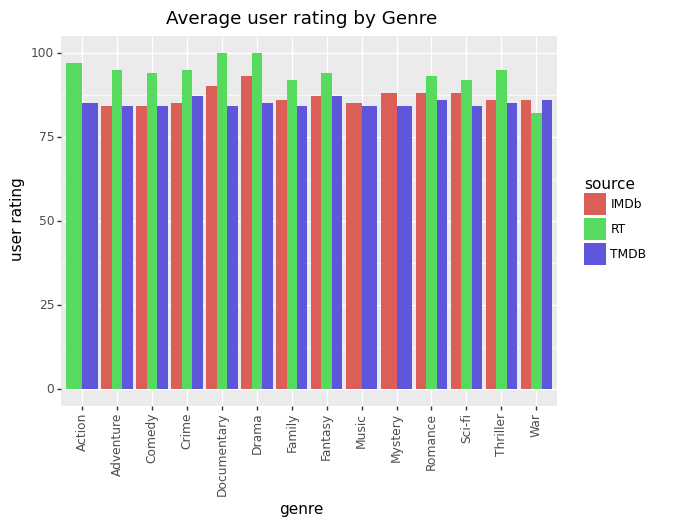

<ggplot: (110584178369)>

In [12]:
# plot a graph of user_rating over genre with 3 bar graphs for each data source
from plotnine import *


#exclude genres with too few movies,
genres_to_exclude = ['']

filtered_df = merged_df[~merged_df['genre'].isin(genres_to_exclude)]

(ggplot(filtered_df, aes(x='genre', y='user_rating', fill='source')) + geom_bar(stat = "identity", position=position_dodge(width=0.9)) + theme(axis_text_x=element_text(angle=90))
 + labs(title="Average user rating by Genre", x="genre", y="user rating")
 
 )

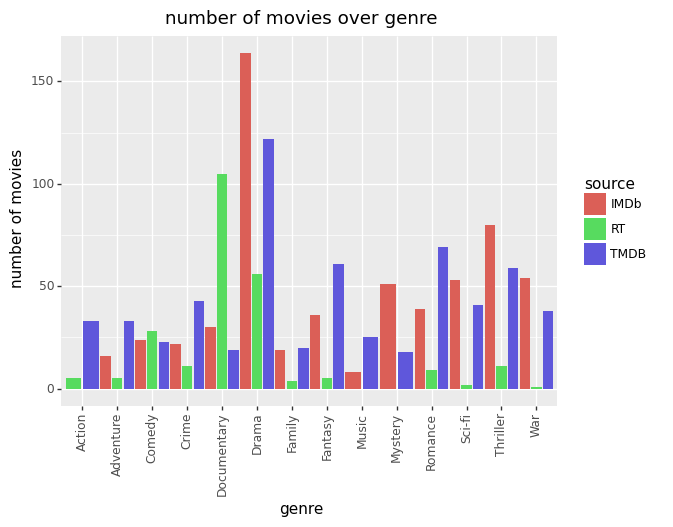

<ggplot: (110485072161)>

In [15]:
genres_to_exclude = ['']

# Learning lesson = "~" means "filter out"
# keyword on OUT in "filter out". This means that all boolean true values are removed
# Learning lesson = isin() literally just gives a boolean mask of true false values that checks if something is in something
# in this case, it finds if any genres in merged_df is in genres_to_exclude and returns a true value if so. the ~ filters OUT the ones with True values
filtered_df = merged_df[~merged_df['genre'].isin(genres_to_exclude)]

#By default, geom_bar() uses the stat="count" transformation, which counts the number of observations in each group (defined by the x aesthetic) and plots the counts as the height of the bars
#However, if you set stat="identity", ggplot will plot the values in the data directly as the heights of the bars, without applying any statistical transformation.
#This is useful when you already have precomputed heights for the bars, or when you want to plot values other than counts (e.g. means, medians, etc.) as the heights of the bars.


(ggplot(filtered_df, aes(x="genre", fill="source"))
 
 + geom_bar( position = position_dodge(width = 1))
 + theme(axis_text_x = element_text(angle = 90))

 + labs (x= "genre", y= "number of movies", title = "number of movies over genre")

)

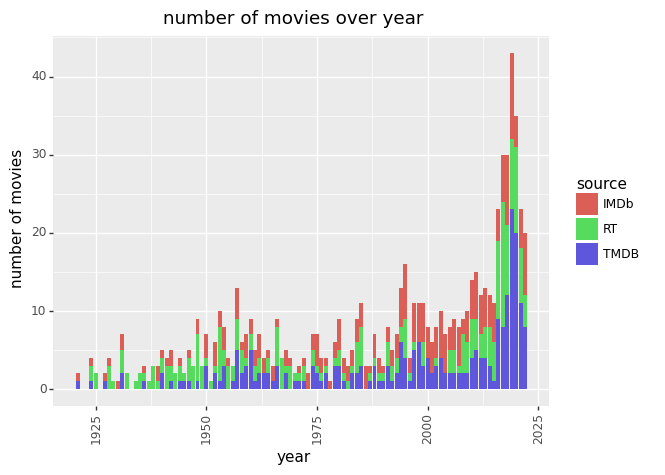

<ggplot: (110582429605)>

In [14]:
for index, row in before_explode_mergered_df.iterrows():
    genres = row['genre']
    genres = str(genres).replace('[', '').replace(']', '')
    before_explode_mergered_df.at[index, 'genre'] = genres


# Plotting the graph of number of movies per year

(ggplot(before_explode_mergered_df, aes(x='year', fill= 'source')) + geom_bar() + theme(axis_text_x=element_text(angle=90))
 + labs(title = "number of movies over year", y = "number of movies")
 
 )